# เตรียมข้อมูล

In [126]:
import os
os.getcwd()

'c:\\Users\\PPUNN\\Documents\\gitproject\\stat_assignment2\\clustering'

In [127]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [128]:
orig_df = pd.read_excel("clust_data61.xlsx")
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,งบกลาง,9939,72812.9,82482.4,239565.7,10783.2,415583.2
1,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,33874.7
2,กระทรวงกลาโหม,91153.1,25039.5,9544.1,6610.7,88176.3,220523.7
3,กระทรวงการคลัง,12235.8,6177.6,3177.1,89.2,216561.9,238241.6
4,กระทรวงการต่างประเทศ,3045.3,2534.2,574,1182.7,1425.3,8761.5
5,กระทรวงการท่องเที่ยวและกีฬา,1342.8,1107.3,1911.2,340.1,1921.5,6622.9
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187,13717.5
7,กระทรวงเกษตรและสหกรณ์,25019.6,15538.5,55276.8,3139.3,856.5,99830.7
8,กระทรวงคมนาคม,9492.6,2308.9,156059.3,268.4,638.8,168768.0
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,6571.2


In [129]:
orig_df.drop([0,21,22,23,24,25,26,27,28,29,30], inplace=True)
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,33874.7
2,กระทรวงกลาโหม,91153.1,25039.5,9544.1,6610.7,88176.3,220523.7
3,กระทรวงการคลัง,12235.8,6177.6,3177.1,89.2,216561.9,238241.6
4,กระทรวงการต่างประเทศ,3045.3,2534.2,574,1182.7,1425.3,8761.5
5,กระทรวงการท่องเที่ยวและกีฬา,1342.8,1107.3,1911.2,340.1,1921.5,6622.9
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187,13717.5
7,กระทรวงเกษตรและสหกรณ์,25019.6,15538.5,55276.8,3139.3,856.5,99830.7
8,กระทรวงคมนาคม,9492.6,2308.9,156059.3,268.4,638.8,168768.0
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,6571.2
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10632,6284.7,12447.3,2493.2,1787.5,33644.7


In [130]:
orig_df.to_csv(r'clustering_data61.csv', index = False, header=True)

# Kmean

In [131]:
df = pd.read_csv("clustering_data61.csv")
df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,33874.7
1,กระทรวงกลาโหม,91153.1,25039.5,9544.1,6610.7,88176.3,220523.7
2,กระทรวงการคลัง,12235.8,6177.6,3177.1,89.2,216561.9,238241.6
3,กระทรวงการต่างประเทศ,3045.3,2534.2,574.0,1182.7,1425.3,8761.5
4,กระทรวงการท่องเที่ยวและกีฬา,1342.8,1107.3,1911.2,340.1,1921.5,6622.9
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187.0,13717.5
6,กระทรวงเกษตรและสหกรณ์,25019.6,15538.5,55276.8,3139.3,856.5,99830.7
7,กระทรวงคมนาคม,9492.6,2308.9,156059.3,268.4,638.8,168768.0
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,6571.2
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10632.0,6284.7,12447.3,2493.2,1787.5,33644.7


<AxesSubplot:>

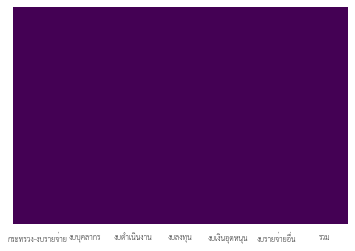

In [132]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [133]:
df.describe()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,27007.160000,7097.425000,17058.510000,27132.805000,18637.250000,96933.150000
std,59120.258281,9032.391824,35860.815983,68842.639224,50700.124851,138354.049196
min,406.600000,337.800000,396.200000,24.500000,187.000000,2221.100000
25%,1983.275000,1149.375000,771.225000,606.825000,703.075000,7845.150000
50%,3716.400000,2652.500000,2955.500000,2540.150000,1580.500000,29062.750000
75%,13630.600000,9998.750000,14844.375000,7602.550000,3825.975000,143362.500000
max,250754.500000,33148.800000,156059.300000,264311.400000,216561.900000,507947.700000


In [134]:
ddf = df[['งบบุคลากร','งบดําเนินงาน','งบลงทุน', 'งบเงินอุดหนุน','งบรายจ่ายอื่น']]
ddf.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,2115.6,733.9,2733.9,1338.6,1180.3
16,406.6,337.8,682.5,12124.0,724.5
17,250754.5,33148.8,34287.6,180797.9,8958.9
18,91525.1,14110.2,22035.6,6978.5,244.6
19,1586.3,609.1,800.8,516.3,1735.7


จะไม่ตัด Outlier ออกเนื่องจากต้องการเทียบทุกกระทรวง

In [135]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(ddf)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.400287,-0.491456,-0.382696,-0.263163,-0.093725
1,1.113194,2.038018,-0.214987,-0.305846,1.407207
2,-0.256344,-0.104482,-0.397147,-0.403037,4.005245
3,-0.415836,-0.518331,-0.471622,-0.386741,-0.348305
4,-0.445382,-0.680411,-0.433365,-0.399298,-0.338263


In [136]:
df_normalized.describe()

,0,1,2,3,4
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-3.608225e-17,3.885781e-17,3.053113e-17,-2.775558e-18,8.326673e-18
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-4.616285e-01,-7.678175e-01,-4.767089e-01,-4.040016e-01,-3.733631e-01
25%,-4.342668e-01,-6.756317e-01,-4.659794e-01,-3.953230e-01,-3.629197e-01
50%,-4.041900e-01,-5.048936e-01,-4.034873e-01,-3.665102e-01,-3.451640e-01
75%,-2.321380e-01,3.295580e-01,-6.334643e-02,-2.910641e-01,-2.997241e-01
max,3.882932e+00,2.959144e+00,3.976814e+00,3.534729e+00,4.005245e+00


C:\Users\PPUNN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

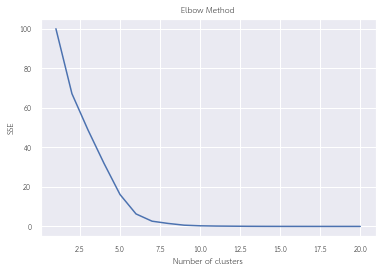

In [137]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

จากกราฟพบว่าค่า k วัดจากจุดที่เปลี่ยนแปลงความชันมากที่สุดอยู่ที่ประมาณ 6

In [138]:
k = 6

In [139]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [140]:
cluster_predictions = kmeans.predict(df_normalized)
ddf['cluster_id'] = cluster_predictions
ddf.tail(10)

C:\Users\PPUNN\AppData\Local\Temp/ipykernel_11912/579068457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['cluster_id'] = cluster_predictions


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
10,785.1,542.7,544.0,24.5,324.8,0
11,2208.7,1716.8,396.2,637.0,2115.0,0
12,17815.0,14050.7,29648.7,264311.4,28477.8,4
13,8775.7,8648.1,4094.6,1014.6,1947.8,0
14,3491.5,1582.6,511.9,42776.4,1197.3,0
15,2115.6,733.9,2733.9,1338.6,1180.3,0
16,406.6,337.8,682.5,12124.0,724.5,0
17,250754.5,33148.8,34287.6,180797.9,8958.9,1
18,91525.1,14110.2,22035.6,6978.5,244.6,2
19,1586.3,609.1,800.8,516.3,1735.7,0


In [141]:
ddf.cluster_id.value_counts()

0    13
2     3
3     1
5     1
4     1
1     1
Name: cluster_id, dtype: int64

## silhouette_score

In [142]:
print(metrics.silhouette_score(ddf,kmeans.labels_))

0.5473029134598806


silhouette_score ยิ่งใกล้เคียง 1 ยิ่งแม่นยำ

## davies_bouldin_score

In [143]:
print(metrics.davies_bouldin_score(ddf,kmeans.labels_))

0.45123285394399365


davies_bouldin_score ยิ่งใกล้เคียง 0 ยิ่งแม่นยำ

## 6 Clusters

#### Cluster 0

In [144]:
ddf[ddf.cluster_id==0].mean()

งบบุคลากร        3242.115385
งบดําเนินงาน     2428.792308
งบลงทุน          2395.461538
งบเงินอุดหนุน    6189.284615
งบรายจ่ายอื่น    2217.707692
cluster_id          0.000000
dtype: float64

In [145]:
df[ddf.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,33874.7
3,กระทรวงการต่างประเทศ,3045.3,2534.2,574.0,1182.7,1425.3,8761.5
4,กระทรวงการท่องเที่ยวและกีฬา,1342.8,1107.3,1911.2,340.1,1921.5,6622.9
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187.0,13717.5
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,6571.2
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10632.0,6284.7,12447.3,2493.2,1787.5,33644.7
10,กระทรวงพลังงาน,785.1,542.7,544.0,24.5,324.8,2221.1
11,กระทรวงพาณิชย์,2208.7,1716.8,396.2,637.0,2115.0,7073.7
13,กระทรวงยุติธรรม,8775.7,8648.1,4094.6,1014.6,1947.8,24480.8
14,กระทรวงแรงงาน,3491.5,1582.6,511.9,42776.4,1197.3,49559.7


#### Cluster 1

In [146]:
ddf[ddf.cluster_id==1].mean()

งบบุคลากร        250754.5
งบดําเนินงาน      33148.8
งบลงทุน           34287.6
งบเงินอุดหนุน    180797.9
งบรายจ่ายอื่น      8958.9
cluster_id            1.0
dtype: float64

In [147]:
df[ddf.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
17,กระทรวงศึกษาธิการ,250754.5,33148.8,34287.6,180797.9,8958.9,507947.7


#### Cluster 2

In [148]:
ddf[ddf.cluster_id==2].mean()

งบบุคลากร        69232.600000
งบดําเนินงาน     18229.400000
งบลงทุน          28952.166667
งบเงินอุดหนุน     5576.166667
งบรายจ่ายอื่น    29759.133333
cluster_id           2.000000
dtype: float64

In [149]:
df[ddf.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,กระทรวงกลาโหม,91153.1,25039.5,9544.1,6610.7,88176.3,220523.7
6,กระทรวงเกษตรและสหกรณ์,25019.6,15538.5,55276.8,3139.3,856.5,99830.7
18,กระทรวงสาธารณสุข,91525.1,14110.2,22035.6,6978.5,244.6,134894.0


#### Cluster 3

In [150]:
ddf[ddf.cluster_id==3].mean()

งบบุคลากร         12235.8
งบดําเนินงาน       6177.6
งบลงทุน            3177.1
งบเงินอุดหนุน        89.2
งบรายจ่ายอื่น    216561.9
cluster_id            3.0
dtype: float64

In [151]:
df[ddf.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
2,กระทรวงการคลัง,12235.8,6177.6,3177.1,89.2,216561.9,238241.6


#### Cluster 4

In [152]:
ddf[ddf.cluster_id==4].mean()

งบบุคลากร         17815.0
งบดําเนินงาน      14050.7
งบลงทุน           29648.7
งบเงินอุดหนุน    264311.4
งบรายจ่ายอื่น     28477.8
cluster_id            4.0
dtype: float64

In [153]:
df[ddf.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
12,กระทรวงมหาดไทย,17815.0,14050.7,29648.7,264311.4,28477.8,354303.6


#### Cluster 5

In [154]:
ddf[ddf.cluster_id==5].mean()

งบบุคลากร          9492.6
งบดําเนินงาน       2308.9
งบลงทุน          156059.3
งบเงินอุดหนุน       268.4
งบรายจ่ายอื่น       638.8
cluster_id            5.0
dtype: float64

In [155]:
df[ddf.cluster_id==5]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
7,กระทรวงคมนาคม,9492.6,2308.9,156059.3,268.4,638.8,168768.0


## Export

In [156]:
show = pd.concat([df, ddf], axis=1, join="inner")
show

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
0,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,33874.7,3941.3,2770.8,3682.2,9474.7,14005.7,0
1,กระทรวงกลาโหม,91153.1,25039.5,9544.1,6610.7,88176.3,220523.7,91153.1,25039.5,9544.1,6610.7,88176.3,2
2,กระทรวงการคลัง,12235.8,6177.6,3177.1,89.2,216561.9,238241.6,12235.8,6177.6,3177.1,89.2,216561.9,3
3,กระทรวงการต่างประเทศ,3045.3,2534.2,574.0,1182.7,1425.3,8761.5,3045.3,2534.2,574.0,1182.7,1425.3,0
4,กระทรวงการท่องเที่ยวและกีฬา,1342.8,1107.3,1911.2,340.1,1921.5,6622.9,1342.8,1107.3,1911.2,340.1,1921.5,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187.0,13717.5,2652.9,3542.9,1383.2,5951.5,187.0,0
6,กระทรวงเกษตรและสหกรณ์,25019.6,15538.5,55276.8,3139.3,856.5,99830.7,25019.6,15538.5,55276.8,3139.3,856.5,2
7,กระทรวงคมนาคม,9492.6,2308.9,156059.3,268.4,638.8,168768.0,9492.6,2308.9,156059.3,268.4,638.8,5
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,6571.2,1163.7,1163.4,1379.2,2587.1,277.8,0
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10632.0,6284.7,12447.3,2493.2,1787.5,33644.7,10632.0,6284.7,12447.3,2493.2,1787.5,0


In [157]:
show.sort_values(by=["cluster_id"])

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
0,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,33874.7,3941.3,2770.8,3682.2,9474.7,14005.7,0
16,กระทรวงวิทยาศาสตร์และเทคโนโลยี,406.6,337.8,682.5,12124.0,724.5,14275.4,406.6,337.8,682.5,12124.0,724.5,0
15,กระทรวงวัฒนธรรม,2115.6,733.9,2733.9,1338.6,1180.3,8102.3,2115.6,733.9,2733.9,1338.6,1180.3,0
14,กระทรวงแรงงาน,3491.5,1582.6,511.9,42776.4,1197.3,49559.7,3491.5,1582.6,511.9,42776.4,1197.3,0
13,กระทรวงยุติธรรม,8775.7,8648.1,4094.6,1014.6,1947.8,24480.8,8775.7,8648.1,4094.6,1014.6,1947.8,0
11,กระทรวงพาณิชย์,2208.7,1716.8,396.2,637.0,2115.0,7073.7,2208.7,1716.8,396.2,637.0,2115.0,0
10,กระทรวงพลังงาน,785.1,542.7,544.0,24.5,324.8,2221.1,785.1,542.7,544.0,24.5,324.8,0
8,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,6571.2,1163.7,1163.4,1379.2,2587.1,277.8,0
9,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10632.0,6284.7,12447.3,2493.2,1787.5,33644.7,10632.0,6284.7,12447.3,2493.2,1787.5,0
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187.0,13717.5,2652.9,3542.9,1383.2,5951.5,187.0,0


In [158]:
show2 = ddf[ddf.cluster_id==0].mean()
for i in range(k-1):
    show2 = pd.concat([show2, ddf[ddf.cluster_id==(i+1)].mean()], axis=1, join="inner")



In [159]:
show2

,0,1,0,0,0,0
งบบุคลากร,3242.115385,250754.5,69232.600000,12235.8,17815.0,9492.6
งบดําเนินงาน,2428.792308,33148.8,18229.400000,6177.6,14050.7,2308.9
งบลงทุน,2395.461538,34287.6,28952.166667,3177.1,29648.7,156059.3
งบเงินอุดหนุน,6189.284615,180797.9,5576.166667,89.2,264311.4,268.4
งบรายจ่ายอื่น,2217.707692,8958.9,29759.133333,216561.9,28477.8,638.8
cluster_id,0.000000,1.0,2.000000,3.0,4.0,5.0
